# Format Raw Data

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Paths
path_ip = 'Financial Data/Excel Data/'
path_op = 'Financial Data/CSV Data/'

In [3]:
# Parse datetime from Bloomberg format
def date_parse (idxs):
    idxs = list(idxs)
    for i in range(len(idxs)):
        if type(idxs[i]) != str:
            idxs[i]=dt.date(idxs[i].year, idxs[i].day, idxs[i].month)
        if type(idxs[i]) == str:
            idxs[i]=dt.date(int(idxs[i][6:]), int(idxs[i][:2]), int(idxs[i][3:5]))
    return idxs

# converts units
def units_conversion (ts):
    for i in range(len(ts)):

        el = str(ts[i]) # get the element

        if 'k' in el: # adjust for the million 
            new_el = str(float(el[:-1])*1e3)
            ts[i] = new_el # update value
        elif 'M' in el: # adjust for the million 
            new_el = str(float(el[:-1])*1e6)
            ts[i] = new_el # update value
        elif 'B' in el: # adjust for the billion 
            new_el = str(float(el[:-1])*1e9)
            ts[i] = new_el # update value
        
    return ts

# converts fractions
def fraction_conversion (ts):
    for i in range(len(ts)):

        el = str(ts[i]) # get the element

        if '¾' in el:  
            new_el = str(float(el[:-1])+3/4)
            ts[i] = new_el # update value
        elif '½' in el:
            new_el = str(float(el[:-1])+2/4)
            ts[i] = new_el # update value
        elif '¼' in el:
            new_el = str(float(el[:-1])+1/4)
            ts[i] = new_el # update value
        elif '⅝' in el:
            new_el = str(float(el[:-1])+5/8)
            ts[i] = new_el # update value
        elif '⅛' in el:
            new_el = str(float(el[:-1])+1/8)
            ts[i] = new_el # update value
        elif '⅜' in el:
            new_el = str(float(el[:-1])+3/8)
            ts[i] = new_el # update value        
        elif '⅞' in el:
            new_el = str(float(el[:-1])+7/8)
            ts[i] = new_el # update value   
        
    return ts


 EQ/SPX
(3372, 6)
                  O        H        L        C            V   OI
2019-05-28  2830.03  2840.51  2801.58  2802.39  947888000.0  0.0
2019-05-24  2832.41  2841.36  2820.19  2826.06  399877000.0  0.0
2019-05-23  2836.70  2836.70  2805.49  2822.24  577204000.0  0.0
2019-05-22  2856.06  2865.47  2851.11  2856.27  432635000.0  0.0
2019-05-21  2854.02  2868.88  2854.02  2864.36  475932000.0  0.0

 EQ/MXCA
(3365, 6)
                  O        H        L        C            V   OI
2019-05-28  2085.58  2090.30  2079.55  2084.10  279096000.0  0.0
2019-05-27  2076.49  2089.63  2075.55  2089.63   39821000.0  0.0
2019-05-24  2072.08  2077.19  2066.67  2074.27  122829000.0  0.0
2019-05-23  2072.83  2072.96  2055.84  2064.85  153179000.0  0.0
2019-05-22  2090.11  2090.64  2084.05  2087.79  126624000.0  0.0

 EQ/UKX
(3386, 6)
                  O        H        L        C             V   OI
2019-05-28  7277.73  7314.85  7262.80  7268.95  1.180000e+09  0.0
2019-05-24  7231.04  7303.04  

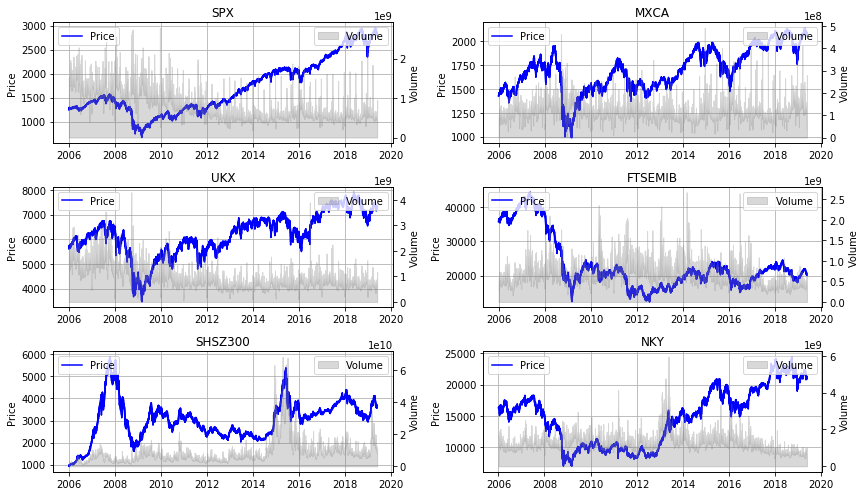

In [4]:
# Adjust indices
fig, axs = plt.subplots(3,2) # plot 3 by 2
symbols = ['EQ/SPX','EQ/MXCA','EQ/UKX','EQ/FTSEMIB','EQ/SHSZ300','EQ/NKY']
for symbol in symbols:
    file_ip = path_ip+symbol+'.xlsx'
    file_op = path_op+symbol+'.csv'
    data = pd.read_excel(file_ip, header=0, index_col=0)
    data = data.dropna() # eliminate non valid values (weekends value)
    data.index = pd.to_datetime(date_parse(data.index))
    data['V'] = units_conversion(data['V'].copy()) # adjust the volume column to number format
    data['OI'] = np.zeros((data.shape[0])) # add open interest column (acts as categorical too)
    data = data.astype(float) # set to float type table
    data = data[:'2006']
    data.to_csv(file_op) # save to csv
    
    print('\n', symbol)
    print(data.shape)
    print(data.head())
    
    # Plot
    ax = axs[int((symbols.index(symbol)-symbols.index(symbol)%2)/2)][int(symbols.index(symbol)%2)]
    ax.set_title(symbol[3:])
    
    # Plot Prices
    ax.plot(data['O'], color='b')
    ax.plot(data['H'], color='b')
    ax.plot(data['L'], color='b')
    ax.plot(data['C'], color='b')
    ax.set_ylabel('Price')
    ax.legend(['Price'], loc='upper left')
    ax.grid()

    # Plot Volume
    tmpax = ax.twinx()
    tmpax.fill_between(data['V'].index, 0, data['V'], color='gray', alpha=0.3)
    tmpax.set_ylabel('Volume')
    tmpax.legend(['Volume'], loc='upper right')
    
fig.set_size_inches(12,7)
fig.tight_layout()


 FX/CHFUSD
(3498, 6)
                 O       H       L       C    V   OI
2019-05-29  0.9924  0.9950  0.9918  0.9929  0.0  0.0
2019-05-28  0.9962  0.9966  0.9903  0.9923  0.0  0.0
2019-05-27  0.9980  0.9989  0.9939  0.9962  0.0  0.0
2019-05-24  0.9967  0.9990  0.9958  0.9982  0.0  0.0
2019-05-23  0.9904  0.9976  0.9902  0.9967  0.0  0.0

 FX/CADUSD
(3498, 6)
                 O       H       L       C    V   OI
2019-05-29  0.7411  0.7417  0.7383  0.7399  0.0  0.0
2019-05-28  0.7437  0.7444  0.7408  0.7411  0.0  0.0
2019-05-27  0.7442  0.7446  0.7434  0.7438  0.0  0.0
2019-05-24  0.7422  0.7446  0.7417  0.7439  0.0  0.0
2019-05-23  0.7443  0.7445  0.7407  0.7422  0.0  0.0

 FX/GBPUSD
(3498, 6)
                 O       H       L       C    V   OI
2019-05-29  1.2653  1.2671  1.2612  1.2627  0.0  0.0
2019-05-28  1.2679  1.2702  1.2651  1.2653  0.0  0.0
2019-05-27  1.2725  1.2753  1.2668  1.2679  0.0  0.0
2019-05-24  1.2657  1.2733  1.2648  1.2714  0.0  0.0
2019-05-23  1.2665  1.2684  1.260

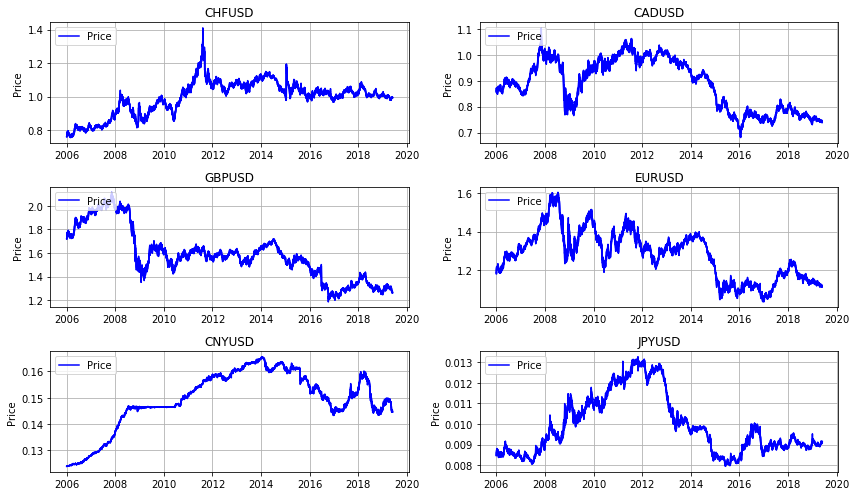

In [5]:
# Adjust currency pairs
fig, axs = plt.subplots(3,2) # plot 3 by 2
symbols = ['FX/CHFUSD','FX/CADUSD','FX/GBPUSD','FX/EURUSD','FX/CNYUSD','FX/JPYUSD']
for symbol in symbols:
    file_ip = path_ip+symbol+'.xlsx'
    file_op = path_op+symbol+'.csv'
    data = pd.read_excel(file_ip, header=0, index_col=0)
    data['V'] = np.zeros((data.shape[0])) # add volume column
    data['OI'] = np.zeros((data.shape[0])) # add open interest column 
    data = data.dropna() # eliminate non valid values (weekends value)
    data.index = pd.to_datetime(date_parse(data.index)) # set index to datetime format
    data = data.astype(float) # set to float type table
    data = data[:'2006']
    data.to_csv(file_op) # save to csv
    
    print('\n', symbol)
    print(data.shape)
    print(data.head())

    # Plot
    ax = axs[int((symbols.index(symbol)-symbols.index(symbol)%2)/2)][int(symbols.index(symbol)%2)]
    ax.set_title(symbol[3:])
    
    # Plot Prices
    ax.plot(data['O'], color='b')
    ax.plot(data['H'], color='b')
    ax.plot(data['L'], color='b')
    ax.plot(data['C'], color='b')
    ax.set_ylabel('Price')
    ax.legend(['Price'], loc='upper left')
    ax.grid()
    
fig.set_size_inches(12,7)
fig.tight_layout()


 FI/USGG10YR
(3353, 6)
                 O       H       L       C    V   OI
2019-05-29  2.2623  2.2658  2.2081  2.2395  0.0  0.0
2019-05-28  2.3079  2.3149  2.2605  2.2658  0.0  0.0
2019-05-24  2.3168  2.3326  2.3062  2.3202  0.0  0.0
2019-05-23  2.3820  2.3838  2.2904  2.3185  0.0  0.0
2019-05-22  2.4246  2.4317  2.3785  2.3820  0.0  0.0

 FI/GCAN10YR
(3354, 6)
                O      H      L      C    V   OI
2019-05-29  1.568  1.573  1.523  1.557  0.0  0.0
2019-05-28  1.572  1.589  1.564  1.576  0.0  0.0
2019-05-27  1.611  1.611  1.593  1.598  0.0  0.0
2019-05-24  1.646  1.651  1.612  1.613  0.0  0.0
2019-05-23  1.676  1.695  1.618  1.642  0.0  0.0

 FI/GUKG10
(3387, 6)
                O      H      L      C    V   OI
2019-05-29  0.916  0.920  0.890  0.892  0.0  0.0
2019-05-28  0.938  0.941  0.914  0.917  0.0  0.0
2019-05-24  0.960  0.981  0.945  0.956  0.0  0.0
2019-05-23  0.991  1.000  0.949  0.953  0.0  0.0
2019-05-22  1.068  1.068  1.011  1.015  0.0  0.0

 FI/GBTPGR10
(3425, 6)


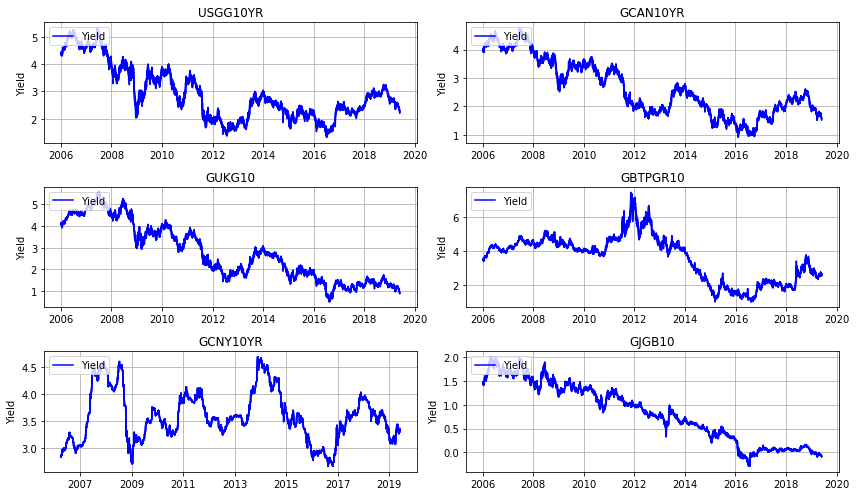

In [6]:
# Adjust Yields Data
fig, axs = plt.subplots(3,2) # plot 3 by 2
symbols = ['FI/USGG10YR','FI/GCAN10YR','FI/GUKG10','FI/GBTPGR10','FI/GCNY10YR','FI/GJGB10']
for symbol in symbols:
    file_ip = path_ip+symbol+'.xlsx'
    file_op = path_op+symbol+'.csv'
    data = pd.read_excel(file_ip, header=0, index_col=0)
    data['V'] = np.zeros((data.shape[0])) # add volume column
    data['OI'] = np.zeros((data.shape[0])) # add open interest column 
    data = data.dropna() # eliminate non valid values (weekends value)
    data.index = pd.to_datetime(date_parse(data.index)) # set index to datetime format
    data = data.astype(float) # set to float type table
    data = data[:'2006']
    data.to_csv(file_op) # save to csv
    
    print('\n', symbol)
    print(data.shape)
    print(data.head())
    
    # Plot
    ax = axs[int((symbols.index(symbol)-symbols.index(symbol)%2)/2)][int(symbols.index(symbol)%2)]
    ax.set_title(symbol[3:])
    
    # Plot Prices
    ax.plot(data['O'], color='b')
    ax.plot(data['H'], color='b')
    ax.plot(data['L'], color='b')
    ax.plot(data['C'], color='b')
    ax.set_ylabel('Yield')
    ax.legend(['Yield'], loc='upper left')
    ax.grid()
    
fig.set_size_inches(12,7)
fig.tight_layout()


 CO/GC1
(3348, 6)
                 O       H       L       C        OI         V
2019-05-28  1283.5  1285.8  1275.1  1277.1   87463.0  362163.0
2019-05-24  1283.2  1284.7  1280.1  1283.6  154081.0  218714.0
2019-05-23  1273.3  1287.1  1272.1  1285.4  183316.0  330160.0
2019-05-22  1274.4  1277.1  1272.0  1274.2  205395.0  191366.0
2019-05-21  1277.7  1277.7  1269.0  1273.2  217039.0  213168.0

 CO/HG1
(3356, 6)
                 O       H       L       C      OI      V
2019-05-28  271.95  271.95  270.10  270.35   377.0  606.0
2019-05-24  269.70  271.40  269.70  270.65   735.0  245.0
2019-05-23  266.50  269.10  266.50  268.65   836.0  351.0
2019-05-22  271.00  271.00  267.75  268.60   954.0  406.0
2019-05-21  273.70  273.90  271.60  272.35  1082.0  396.0

 CO/CL1
(3343, 6)
                O      H      L      C        OI          V
2019-05-28  58.94  59.57  58.13  59.14  412018.0  1020000.0
2019-05-24  58.21  59.10  57.50  58.63  446730.0   758099.0
2019-05-23  61.31  61.41  57.33  57.9

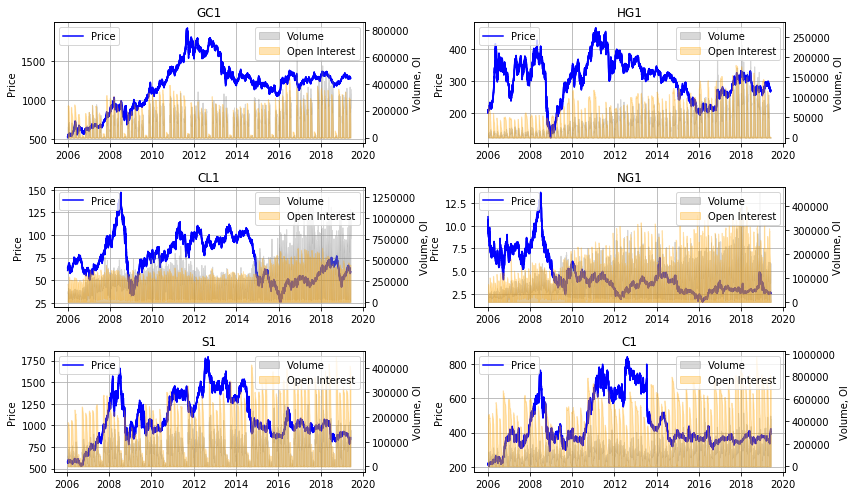

In [7]:
# Adjust commodities data
fig, axs = plt.subplots(3,2) # plot 3 by 2
symbols = ['CO/GC1','CO/HG1','CO/CL1','CO/NG1','CO/S1','CO/C1']
for symbol in symbols:

    file_ip = path_ip+symbol+'.xlsx'
    file_op = path_op+symbol+'.csv'
    data = pd.read_excel(file_ip, header=0, index_col=0)
    data = data.dropna() # eliminate non valid values (weekends value)
    data.index = pd.to_datetime(date_parse(data.index)) # set index to datetime format
    data['V'] = units_conversion(data['V'].copy()) # adjust the volume column to number format
    data['OI'] = units_conversion(data['OI'].copy()) # adjust the open interest column to number format
    data['O'] = fraction_conversion(data['O'].copy()) # convert fractions
    data['H'] = fraction_conversion(data['H'].copy()) # convert fractions
    data['L'] = fraction_conversion(data['L'].copy()) # convert fractions
    data['C'] = fraction_conversion(data['C'].copy()) # convert fractions
    data = data.astype(float) # set to float type table
    data = data[:'2006']
    data.to_csv(file_op) # save to csv
    
    print('\n', symbol)
    print(data.shape)
    print(data.head())
    
    # Plot
    ax = axs[int((symbols.index(symbol)-symbols.index(symbol)%2)/2)][int(symbols.index(symbol)%2)]
    ax.set_title(symbol[3:])
    
    # Plot Prices
    ax.plot(data['O'], color='b')
    ax.plot(data['H'], color='b')
    ax.plot(data['L'], color='b')
    ax.plot(data['C'], color='b')
    ax.set_ylabel('Price')
    ax.legend(['Price'], loc='upper left')
    ax.grid()

    # Plot Volume
    tmpax = ax.twinx()
    tmpax.fill_between(data['V'].index, 0, data['V'], color='gray', alpha=0.3)
    tmpax.fill_between(data['OI'].index, 0, data['OI'], color='orange', alpha=0.3)
    tmpax.set_ylabel('Volume, OI')
    tmpax.legend(['Volume', 'Open Interest'], loc='upper right')
    
fig.set_size_inches(12,7)
fig.tight_layout()